## Exploratory Data Analysis: Fake Product Review Detection

This notebook performs Exploratory Data Analysis (EDA) on a dataset of product reviews to understand its characteristics and prepare for building a machine learning model to detect fake reviews.

### 1) Problem Statement

Fake product reviews can have a significant impact on e-commerce platforms, leading to misleading information for potential customers and affecting the overall trust in the platform. The objective is to create a machine learning model that can distinguish between fake and real reviews based on structured features (such as rating patterns, user behavior, etc.), without relying on complex NLP techniques. The model will help e-commerce platforms identify fraudulent reviews and ensure the authenticity of feedback on products.

### 2) Data Collection

The dataset `fakereviewsdataset.csv` contains product reviews with associated metadata, including category, rating, and a label indicating whether the review is computer-generated (fake) or original (real).

### 2.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2.2 Load Dataset

In [ ]:
df = pd.read_csv('data/data.csv')

### 2.3 Dataset Information

In [21]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [22]:
df.shape

(40432, 4)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set

### 3.1 Missing Values

In [24]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

### 3.2 Duplicate Values

In [25]:
df.duplicated().sum()

np.int64(12)

### 3.3 Data Types

In [26]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


### 3.4 Checking the number of unique values of each column

In [27]:
df.nunique()

category       10
rating          5
label           2
text_       40412
dtype: int64

### 3.5 Check statistics of data set

In [28]:
df.describe(include='all')

,category,rating,label,text_
count,40432,40432.000000,40432,40432
unique,10,NaN,2,40412
top,Kindle_Store_5,NaN,CG,My dog loves it and it has kept her occupied f...
freq,4730,NaN,20216,2
mean,NaN,4.256579,NaN,NaN
std,NaN,1.144354,NaN,NaN
min,NaN,1.000000,NaN,NaN
25%,NaN,4.000000,NaN,NaN
50%,NaN,5.000000,NaN,NaN
75%,NaN,5.000000,NaN,NaN


### 3.6 Droping and Checking Duplicates

In [29]:
df = df.drop_duplicates()

In [30]:
df.duplicated().sum()

np.int64(0)

### 4) Exploratory Data Analysis

#### 4.1 Distribution of Labels (Fake vs. Real Reviews)

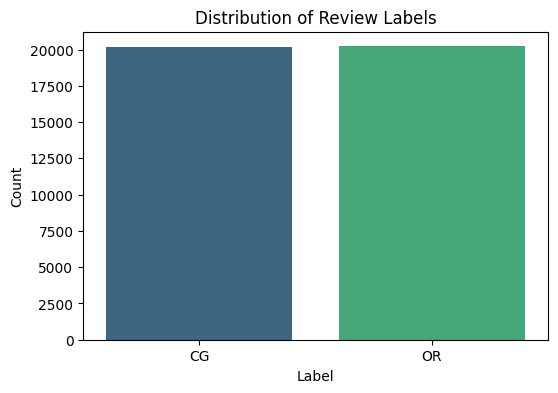

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Review Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

#### 4.2 Distribution of Ratings

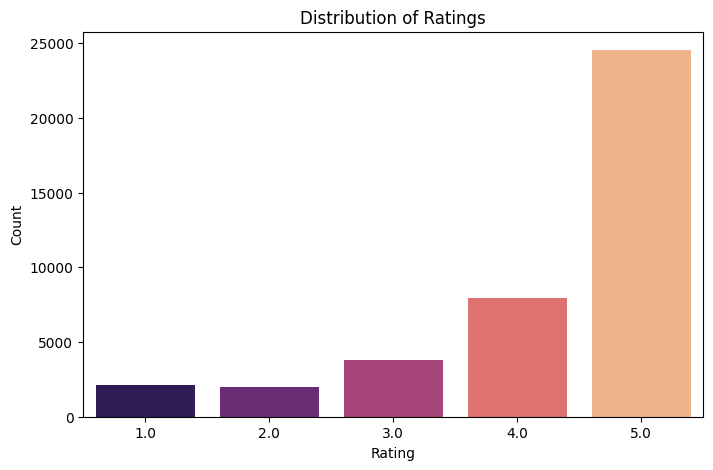

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, palette='magma')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### 4.3 Distribution of Categories

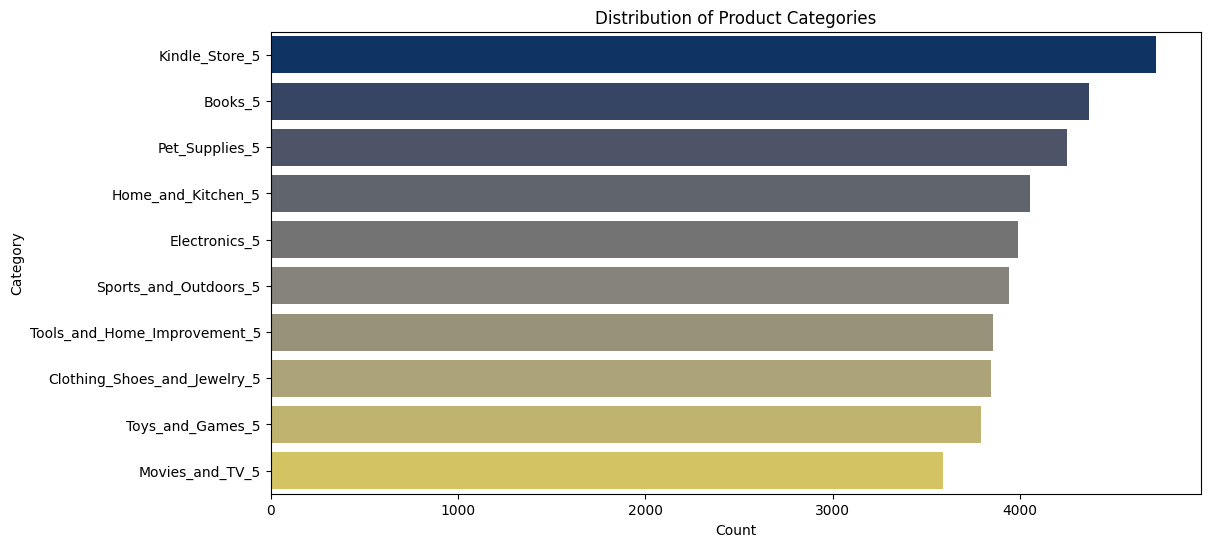

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(y='category', data=df, palette='cividis', order=df['category'].value_counts().index)
plt.title('Distribution of Product Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

#### 4.4 Relationship between Rating and Label

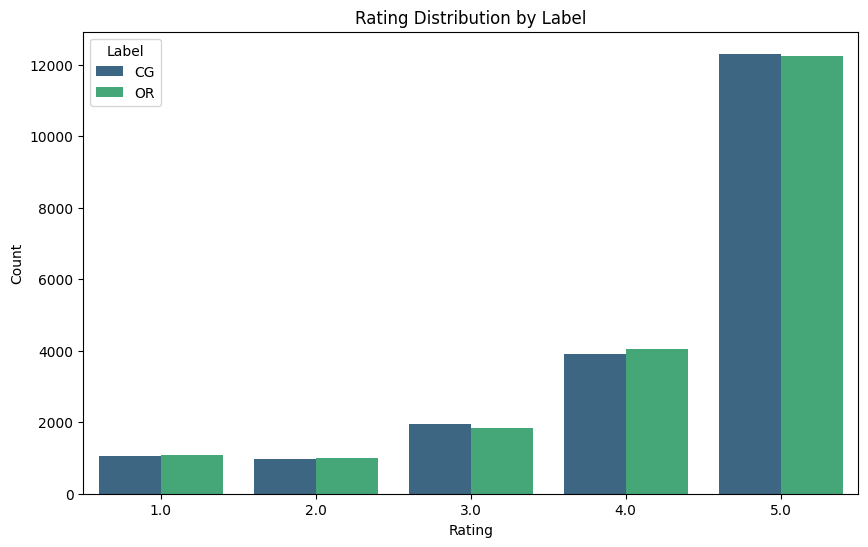

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='label', data=df, palette='viridis')
plt.title('Rating Distribution by Label')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

#### 4.5 Relationship between Category and Label

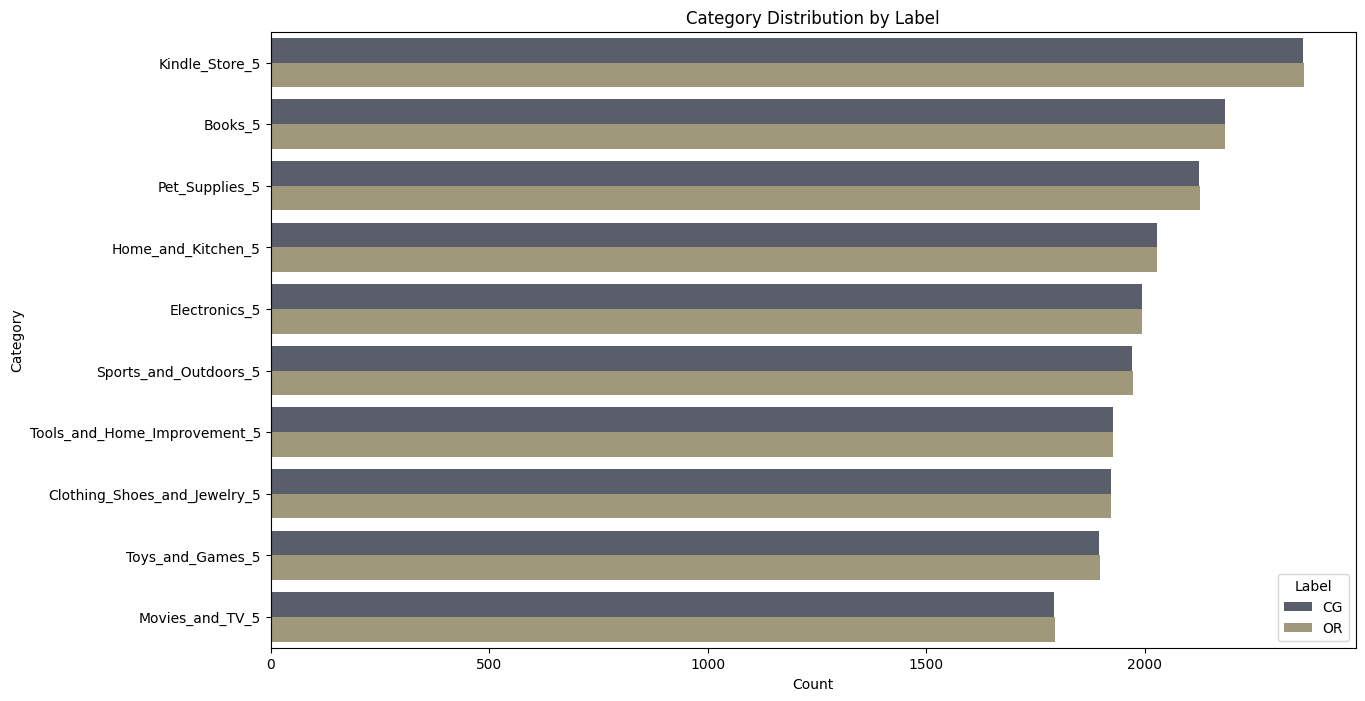

In [18]:
plt.figure(figsize=(14, 8))
sns.countplot(y='category', hue='label', data=df, palette='cividis', order=df['category'].value_counts().index)
plt.title('Category Distribution by Label')
plt.xlabel('Count')
plt.ylabel('Category')
plt.legend(title='Label')
plt.show()

#### 4.6 Text Length Analysis (Basic - without complex NLP)

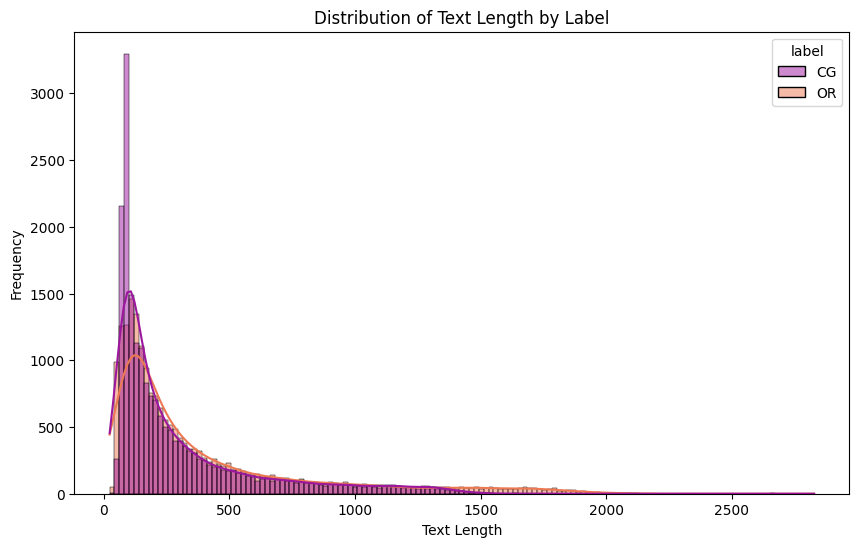

In [19]:
df['text_length'] = df['text_'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', kde=True, palette='plasma')
plt.title('Distribution of Text Length by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

### 5) Conclusions and Next Steps

This EDA has provided insights into the dataset's structure and the relationships between its features. Key observations include:

- The dataset is balanced in terms of fake (CG) and real (OR) reviews.
- There's a clear imbalance in ratings, with 5.0 being the most common.
- Visualizations show how ratings and categories are distributed across fake and real reviews, which can be crucial for feature engineering.
- Basic text length analysis suggests potential differences in review lengths between fake and real reviews, even without deep NLP.